# NOTEBOOK PARA TESTES


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern, hog, graycomatrix, graycoprops
from libs.preprocessing import converter_para_cinza, aplicar_filtro_gaussiano, detectar_bordas_canny
from libs.segmentation import segmentar_objeto_com_flood_fill, filtrar_contornos_borda, encontrar_contornos, desenhar_contornos
from libs.features import extrair_caracteristicas_forma, extrair_lbp, extrair_glcm, extrair_hog
from libs.visualization import plotar_resultados_segmentacao, plotar_caracteristicas, plotar_histograma_lbp


In [ ]:
def processar_imagem(caminho_imagem, pasta_saida="processed"):
    """
    Pipeline melhorado com segmentação por flood fill para reconhecimento de produtos.
    
    Características principais:
    - Segmentação precisa com Flood Fill
    - Filtro de contornos que tocam bordas
    - Extração avançada de características (LBP, GLCM, HOG)
    - Limpeza morfológica para remover ruído
    """
    
    # Carregar imagem
    imagem_original = cv2.imread(caminho_imagem)
    if imagem_original is None:
        raise ValueError(f"Falha ao ler a imagem {caminho_imagem} com o OpenCV.")
    
    # Configuração inicial
    nome_imagem = caminho_imagem.split('.')[0]  # Remove extensão
    import os
    os.makedirs(pasta_saida, exist_ok=True)
    
    # Salvar imagem original
    cv2.imwrite(f"{pasta_saida}/{nome_imagem}_original.png", imagem_original)
    
    # 1. Pré-processamento
    cinza = converter_para_cinza(imagem_original)
    gaussiano = aplicar_filtro_gaussiano(cinza)
    
    cv2.imwrite(f"{pasta_saida}/{nome_imagem}_cinza.png", cinza)
    cv2.imwrite(f"{pasta_saida}/{nome_imagem}_gaussiano.png", gaussiano)
    
    # 2. Segmentação melhorada com Flood Fill
    mascara_limpa = segmentar_objeto_com_flood_fill(gaussiano)
    bordas = detectar_bordas_canny(gaussiano)
    
    # 3. Contornos filtrados
    contornos_todos = encontrar_contornos(mascara_limpa)
    contornos_filtrados = filtrar_contornos_borda(contornos_todos, gaussiano.shape[1], gaussiano.shape[0])
    imagem_contornos = desenhar_contornos(imagem_original, contornos_filtrados)
    
    # Salvar resultados de segmentação
    cv2.imwrite(f"{pasta_saida}/{nome_imagem}_mascara_limpa.png", mascara_limpa)
    cv2.imwrite(f"{pasta_saida}/{nome_imagem}_bordas.png", bordas)
    cv2.imwrite(f"{pasta_saida}/{nome_imagem}_contornos.png", imagem_contornos)
    
    # 4. Extração de características avançadas
    caracteristicas_forma = extrair_caracteristicas_forma(contornos_filtrados)
    lbp_img, lbp_hist = extrair_lbp(cinza)
    glcm_caracteristicas = extrair_glcm(cinza)
    hog_vector, hog_img = extrair_hog(cinza)
    
    # Salvar características visuais
    cv2.imwrite(f"{pasta_saida}/{nome_imagem}_lbp.png", lbp_img)
    cv2.imwrite(f"{pasta_saida}/{nome_imagem}_hog.png", hog_img)
    
    # Retornar resultados completos
    return {
        "imagem_original": imagem_original,
        "cinza": cinza,
        "gaussiano": gaussiano,
        "mascara_limpa": mascara_limpa,
        "bordas": bordas,
        "contornos_todos": contornos_todos,
        "contornos_filtrados": contornos_filtrados,
        "imagem_contornos": imagem_contornos,
        "caracteristicas_forma": caracteristicas_forma,
        "lbp_imagem": lbp_img,
        "lbp_histograma": lbp_hist,
        "glcm_caracteristicas": glcm_caracteristicas,
        "hog_vector": hog_vector,
        "hog_imagem": hog_img
    }


In [21]:
# =============================================================================
# EXECUÇÃO DO PIPELINE
# =============================================================================

# Processar a imagem usando o pipeline melhorado com Flood Fill
resultados = processar_imagem("apple.jpg", "processed")

# Exibir resultados
print("=" * 70)
print("RESULTADOS DO PIPELINE MELHORADO COM FLOOD FILL")
print("=" * 70)

print(f"\n📁 Informações da Imagem:")
print(f"   Dimensões: {resultados['imagem_original'].shape}")

print(f"\n🔍 Análise de Contornos Melhorada:")
print(f"   Contornos antes do filtro: {len(resultados['contornos_todos'])}")
print(f"   Contornos após filtro: {len(resultados['contornos_filtrados'])}")

caracteristicas_forma = resultados['caracteristicas_forma']
if caracteristicas_forma:
    maior = max(caracteristicas_forma, key=lambda feat: feat["area"])
    print(f"   Maior contorno detectado:")
    print(f"     - Área: {maior['area']:.2f}")
    print(f"     - Perímetro: {maior['perimetro']:.2f}")
    print(f"     - Circularidade: {maior['circularidade']:.3f}")
    print(f"     - Bounding box: {maior['bounding_box']}")
else:
    print("   Nenhum contorno detectado.")

print(f"\n📊 Características Extraídas:")
print(f"   LBP - Primeiros 10 bins: {resultados['lbp_histograma'][:10]}")
print(f"   GLCM - Propriedades:")
for prop, valor in resultados['glcm_caracteristicas'].items():
    print(f"     - {prop}: {valor:.4f}")
print(f"   HOG - Tamanho do vetor: {resultados['hog_vector'].size}")

print(f"\n✅ Pipeline melhorado executado com sucesso!")
print(f"   Imagens salvas em: processed/")
print(f"   🎯 Segmentação melhorada com Flood Fill ativa!")


RESULTADOS DO PIPELINE MELHORADO COM FLOOD FILL

📁 Informações da Imagem:
   Dimensões: (198, 198, 3)

🔍 Análise de Contornos Melhorada:
   Contornos antes do filtro: 2
   Contornos após filtro: 2
   Maior contorno detectado:
     - Área: 20964.00
     - Perímetro: 581.53
     - Circularidade: 0.779
     - Bounding box: (22, 9, 162, 180)

📊 Características Extraídas:
   LBP - Primeiros 10 bins: [0.03662892 0.05458627 0.04336292 0.07175288 0.1020049  0.10840731
 0.05193348 0.06277421 0.37503826 0.09351087]
   GLCM - Propriedades:
     - contrast: 279.1990
     - dissimilarity: 7.8741
     - homogeneity: 0.4250
     - ASM: 0.1159
     - energy: 0.3403
     - correlation: 0.9734
   HOG - Tamanho do vetor: 4356

✅ Pipeline melhorado executado com sucesso!
   Imagens salvas em: processed/
   🎯 Segmentação melhorada com Flood Fill ativa!


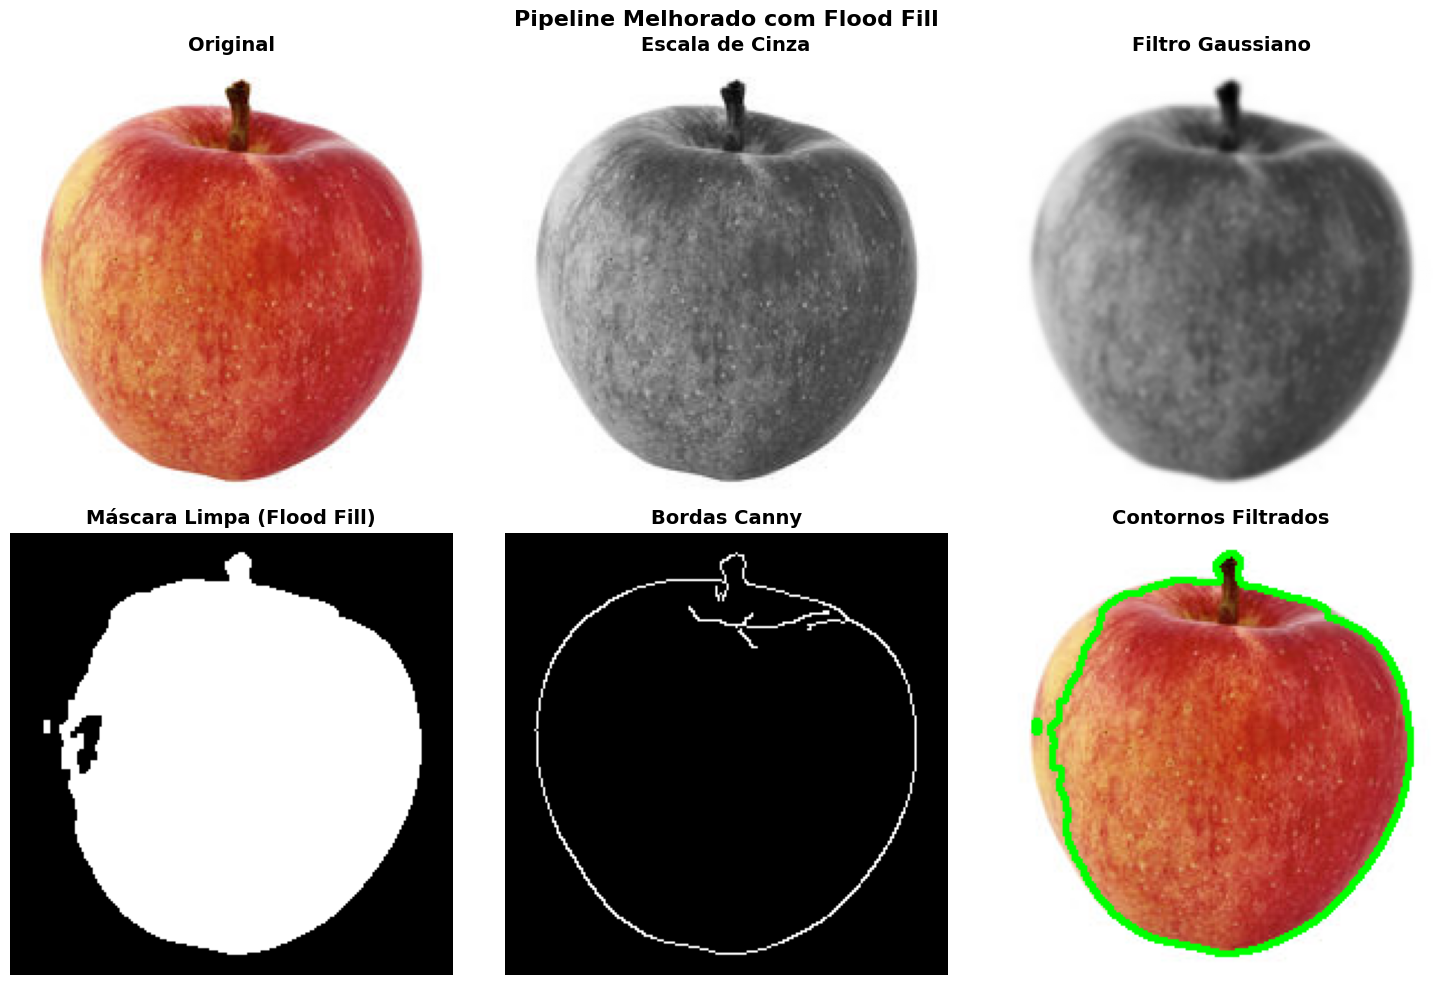

In [22]:
# =============================================================================
# VISUALIZAÇÃO DOS RESULTADOS
# =============================================================================

plotar_resultados_segmentacao(resultados)


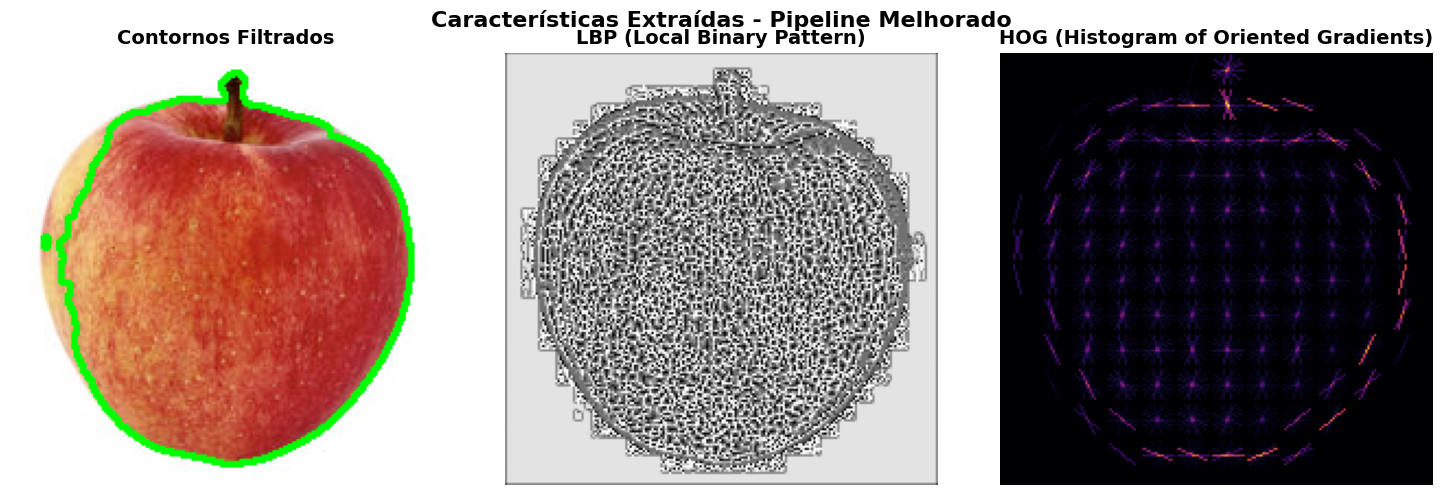

In [23]:
# =============================================================================
# VISUALIZAÇÃO DAS CARACTERÍSTICAS
# =============================================================================

plotar_caracteristicas(resultados)


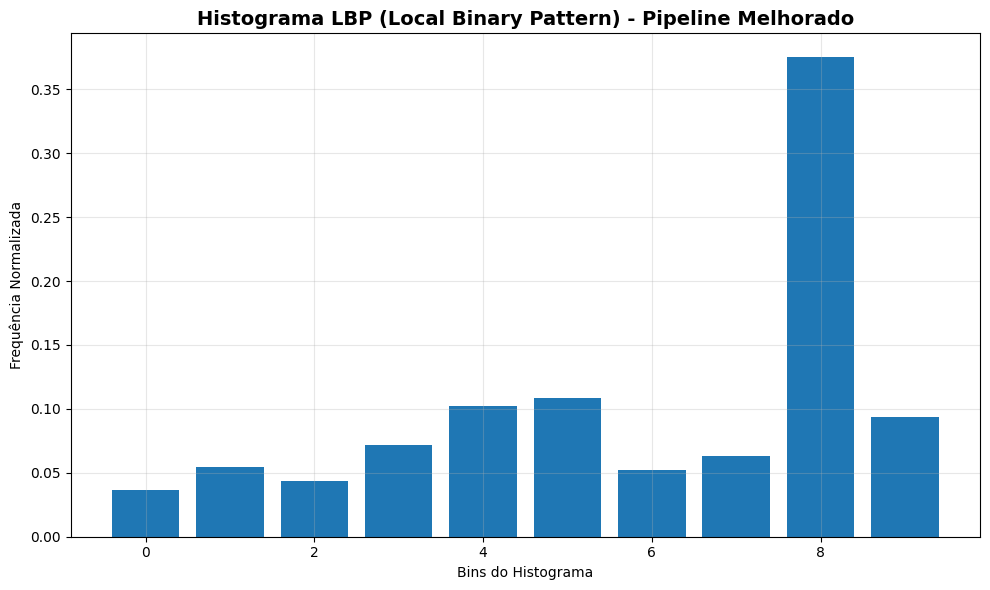

In [24]:
# =============================================================================
# HISTOGRAMA LBP
# =============================================================================

plotar_histograma_lbp(resultados)


In [25]:
# =============================================================================
# RESUMO FINAL
# =============================================================================

print("🎯 PIPELINE MELHORADO COM FLOOD FILL - RESUMO")
print("=" * 50)

print("\n✅ FUNCIONALIDADES IMPLEMENTADAS:")
print("   • Segmentação precisa com Flood Fill")
print("   • Filtro de contornos que tocam bordas")
print("   • Limpeza morfológica para remover ruído")
print("   • Extração de características LBP (textura)")
print("   • Extração de características GLCM (textura)")
print("   • Extração de características HOG (forma)")
print("   • Análise geométrica de contornos")

print("\n🔧 MELHORIAS TÉCNICAS:")
print("   • THRESH_BINARY_INV para objetos escuros em fundo branco")
print("   • Flood Fill automático nos 4 cantos da imagem")
print("   • Operações morfológicas (OPEN + CLOSE)")
print("   • Filtro inteligente de contornos de borda")

print("\n📊 RESULTADOS OBTIDOS:")
print(f"   • Contornos detectados: {len(resultados['contornos_filtrados'])}")
print(f"   • Características LBP: {len(resultados['lbp_histograma'])} bins")
print(f"   • Características GLCM: {len(resultados['glcm_caracteristicas'])} propriedades")
print(f"   • Características HOG: {resultados['hog_vector'].size} dimensões")

print("\n🚀 PRÓXIMOS PASSOS:")
print("   • Integrar com API Flask para uso em produção")
print("   • Implementar classificação de produtos")
print("   • Conectar com frontend React")
print("   • Adicionar base de dados de produtos")


🎯 PIPELINE MELHORADO COM FLOOD FILL - RESUMO

✅ FUNCIONALIDADES IMPLEMENTADAS:
   • Segmentação precisa com Flood Fill
   • Filtro de contornos que tocam bordas
   • Limpeza morfológica para remover ruído
   • Extração de características LBP (textura)
   • Extração de características GLCM (textura)
   • Extração de características HOG (forma)
   • Análise geométrica de contornos

🔧 MELHORIAS TÉCNICAS:
   • THRESH_BINARY_INV para objetos escuros em fundo branco
   • Flood Fill automático nos 4 cantos da imagem
   • Operações morfológicas (OPEN + CLOSE)
   • Filtro inteligente de contornos de borda

📊 RESULTADOS OBTIDOS:
   • Contornos detectados: 2
   • Características LBP: 10 bins
   • Características GLCM: 6 propriedades
   • Características HOG: 4356 dimensões

🚀 PRÓXIMOS PASSOS:
   • Integrar com API Flask para uso em produção
   • Implementar classificação de produtos
   • Conectar com frontend React
   • Adicionar base de dados de produtos
